# Kaggle Bike Sharing Demand Competition

Imports

In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import os

Import csv into dataframe

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [102]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [103]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<function matplotlib.pyplot.show(*args, **kw)>

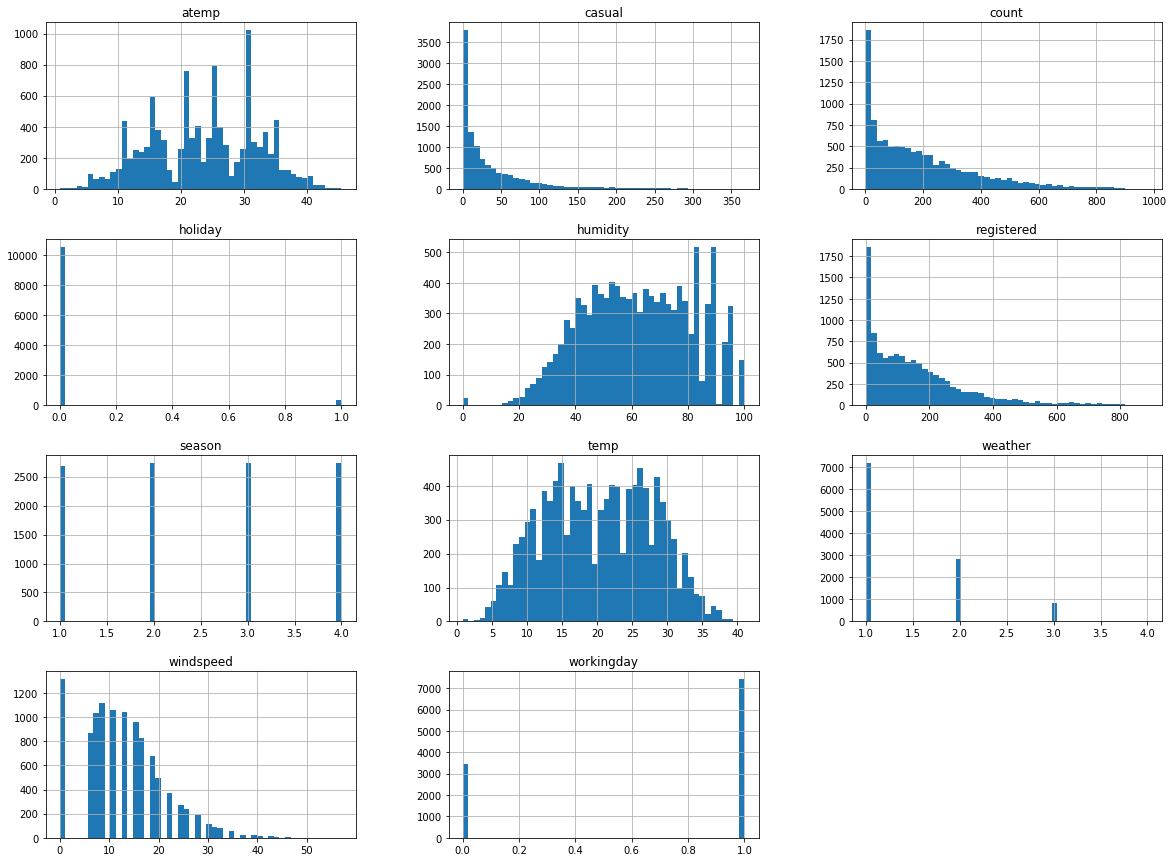

In [104]:
train.hist(bins=50, figsize=(20,15))
plt.show

Standardize data using a MinMax scalar

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train[['atemp','humidity','season','temp','weather','windspeed']] = scaler.fit_transform(train[['atemp','humidity','season','temp','weather','windspeed']])
test[['atemp','humidity','season','temp','weather','windspeed']] = scaler.fit_transform(test[['atemp','humidity','season','temp','weather','windspeed']])

<function matplotlib.pyplot.show(*args, **kw)>

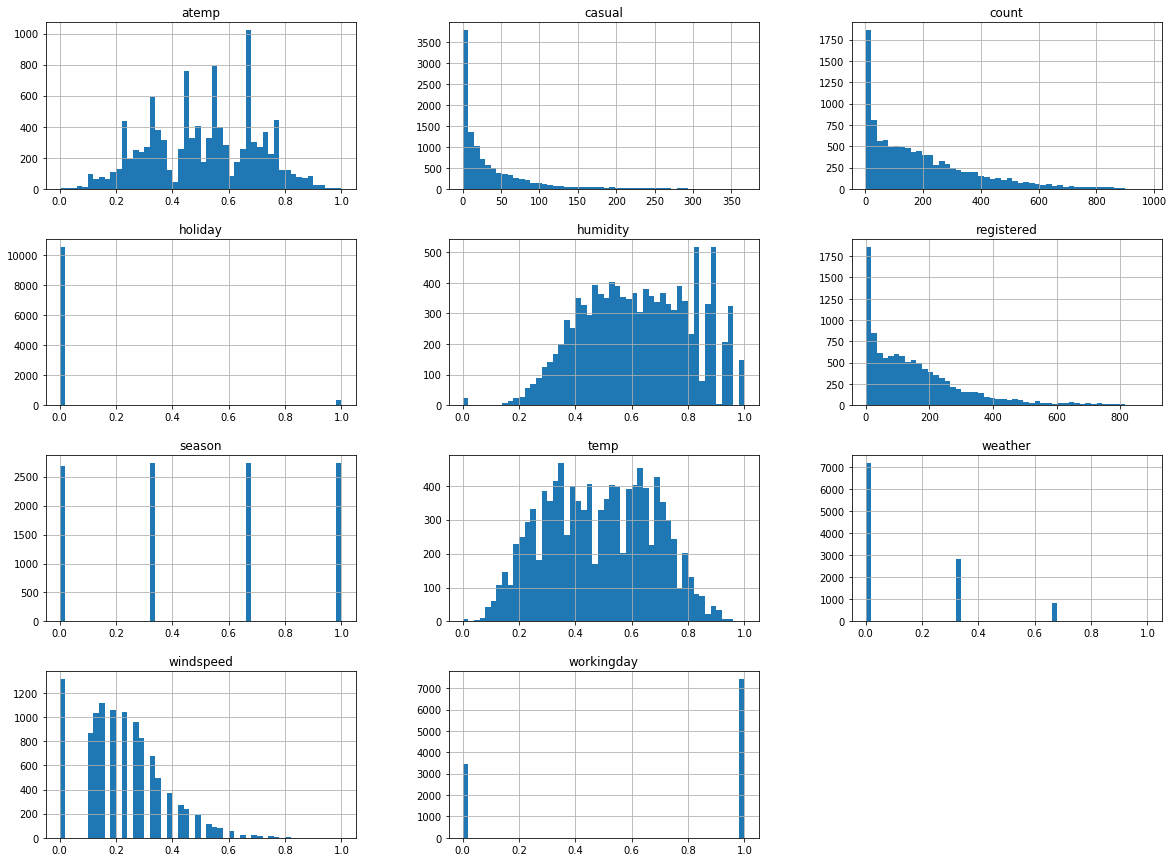

In [106]:
train.hist(bins=50, figsize=(20,15))
plt.show

In [107]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,0.0,0,0,0.0,0.224490,0.305068,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,0.0,0,0,0.0,0.204082,0.288064,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,0.0,0,0,0.0,0.204082,0.288064,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,0.0,0,0,0.0,0.224490,0.305068,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,0.0,0,0,0.0,0.224490,0.305068,0.75,0.0,0,1,1


In [108]:
train['datetime'] = train['datetime'].str.replace("-","")
train['datetime'] = train['datetime'].str.replace(":","")
train['datetime'] = train['datetime'].str.replace(" ","")
train[['datetime']] = scalar.fit_transform(train[['datetime']])

test['datetime'] = test['datetime'].str.replace("-","")
test['datetime'] = test['datetime'].str.replace(":","")
test['datetime'] = test['datetime'].str.replace(" ","")
test[['datetime']] = scalar.fit_transform(test[['datetime']])

In [109]:
train_final = train.drop("count",axis=1)
train_final = train_final.drop("registered",axis=1)
train_final = train_final.drop("casual",axis=1)
train_count = train[["count","registered","casual"]].copy()

In [110]:
train_array = train_final.values
test_array = test.values
train_array

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.05067681e-01, 8.10000000e-01, 0.00000000e+00],
       [8.99423867e-07, 0.00000000e+00, 0.00000000e+00, ...,
        2.88063542e-01, 8.00000000e-01, 0.00000000e+00],
       [1.79884751e-06, 0.00000000e+00, 0.00000000e+00, ...,
        2.88063542e-01, 8.00000000e-01, 0.00000000e+00],
       ...,
       [9.99998201e-01, 1.00000000e+00, 0.00000000e+00, ...,
        3.38964090e-01, 6.10000000e-01, 2.63195016e-01],
       [9.99999101e-01, 1.00000000e+00, 0.00000000e+00, ...,
        3.72860499e-01, 6.10000000e-01, 1.05325026e-01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.55856360e-01, 6.60000000e-01, 1.57869989e-01]])

In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_array,train_count)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
prediction = lin_reg.predict(test_array)
print("Predictions: ",prediction)

Predictions:  [[ 82.20069266  83.34927732  -1.14858465]
 [ 67.08472786  67.57415426  -0.4894264 ]
 [ 67.08480745  67.57422459  -0.48941714]
 ...
 [149.41938621 143.8482204    5.57116581]
 [164.87114688 154.27455313  10.59659374]
 [134.33088217 133.23126819   1.09961398]]


<function matplotlib.pyplot.show(*args, **kw)>

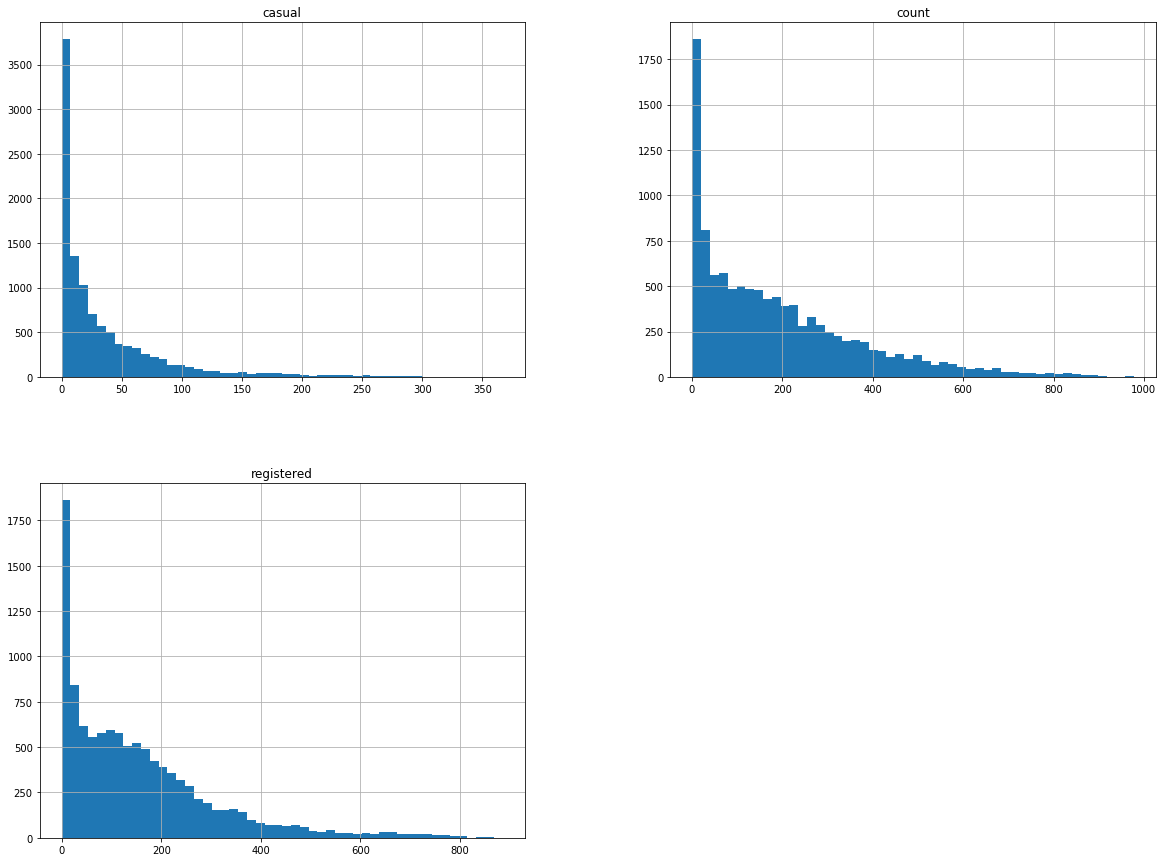

In [113]:
train_count.hist(bins=50, figsize=(20,15))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

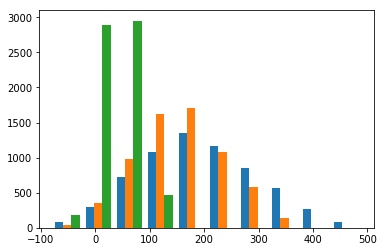

In [130]:
plt.hist(prediction)
plt.show

In [120]:
pred_count = prediction[:,0]
pred_registered = prediction[:,1]
pred_casual = prediction[:,2]